# Direct Methods for the Solution of a Linear System

In [1]:
import numpy as np
import scipy as sp
from math import e
import matplotlib.pyplot as plt

> Given a matrix A ∈ R^(n×n) and the vector x_true = (1,1,...,1)^T ∈ R^n:

In [2]:
N = 100
A = np.random.randn(N,N)
x_true = np.ones( (N,1) )

> Compute the right-hand side of the linear system b = A@x_true:

In [3]:
b = A@x_true

> Compute the condition number in 2-norm of the matrix A:

In [4]:
cond_num = np.linalg.cond(A,2)
print(cond_num)

1768.6340592404576


The problem is ill-conditioned because its condition number is huge (not close to zero), so for little variation of b and A the solution will have a big variation.

> What if we use the ∞-norm instead of the 2-norm?

In [5]:
cond_num_inf = np.linalg.cond(A,np.inf)
print(cond_num_inf)

18570.366247830265


The problem is 'more' ill-conditioned than the case with the 2-norm, with a 10 magnitude more than the previous.

> Solve the linear system Ax = b with the function np.linalg.solve():

In [6]:
x = np.linalg.solve(A,b)

> Compute the relative error between the solution computed before and the true solution x_true:

In [7]:
relative_error = np.linalg.norm(x-x_true,2)/np.linalg.norm(x_true,2)
print(relative_error)

1.66398175064833e-13


> Plot a graph with the condition number in 2-norm K2(A) and in ∞-norm, as a function of n

In [18]:
def plot_relative_error(matrices, domain, title_matrix):
    err = []

    for A in matrices:
        n = A.shape[0]
        x_true = np.ones((n,))
        b = A@x_true
        x = np.linalg.solve(A,b)
        err.append(np.linalg.norm(x-x_true,2)/np.linalg.norm(x_true,2))

    #ls = np.linspace(1,len(err),len(err))
    plt.figure(figsize=(20,5))
    plt.title(f'Relative error for increasing values of N using {title_matrix}')
    plt.plot(domain, err)
    plt.xlabel("n")
    plt.ylabel('Relative error')
    plt.grid()
    plt.show()

In [19]:
def plot_conditioning(matrices, domain, title_matrix):
    conditioning_2 = []
    conditioning_inf = []

    for A in matrices:
        conditioning_2.append(np.linalg.cond(A,2))
        conditioning_inf.append(np.linalg.cond(A,np.inf))

    #ls = np.linspace(1,len(conditioning_2),len(conditioning_2))
    plt.figure(figsize=(20,5))
    plt.title(f'Conditioning for 2-norm and ∞-norm using {title_matrix}')
    plt.plot(domain, conditioning_2,'orange', label='2-norm conditioning')
    plt.plot(domain, conditioning_inf,'green', label='∞-norm conditioning')
    plt.xlabel("n")
    plt.ylabel('Conditioning')
    plt.legend()
    plt.grid()
    plt.show()

I tested from 1 to 100 increasing dimensions:

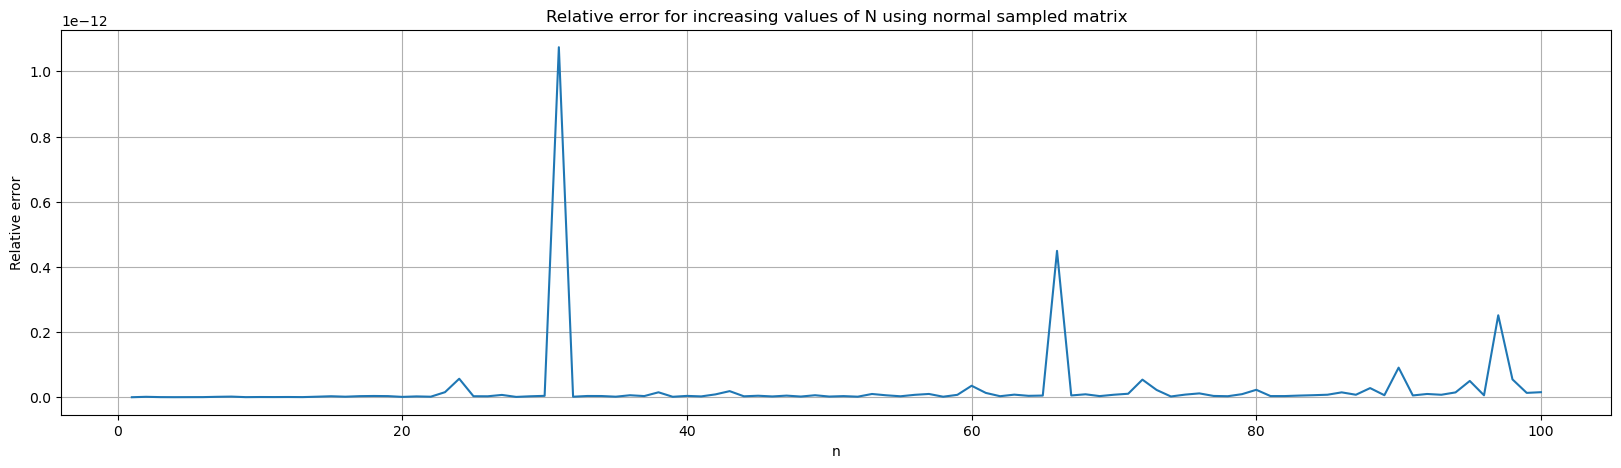

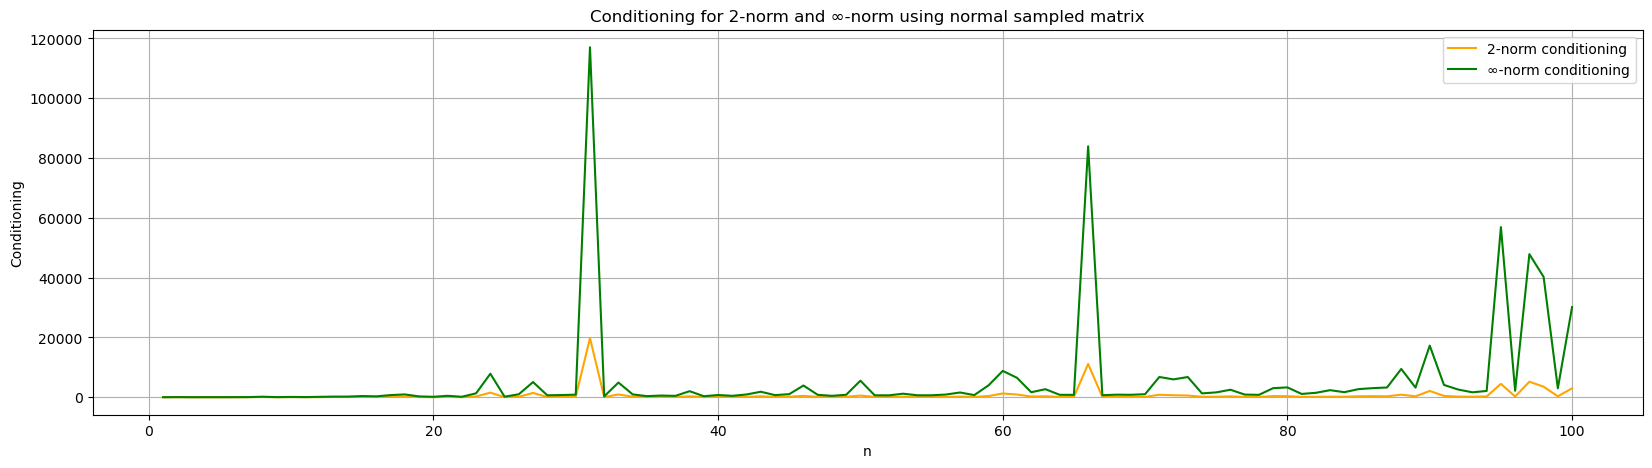

In [20]:
linspace = np.linspace(1, 100, 100, dtype=int)
matrices = []
for n in linspace:
    matrices.append(np.random.randn(n,n))

plot_relative_error(matrices, linspace, 'normal sampled matrix')
plot_conditioning(matrices, linspace, 'normal sampled matrix')


Comparing the two graphs, we observe that the fashion of the norms and the fashion of the relative error are very similar (except for the order of magnitude).

> Testing the program with a random matrix generated from a uniform distribution with size varying between n = {10, 20, 30, ..., 100}

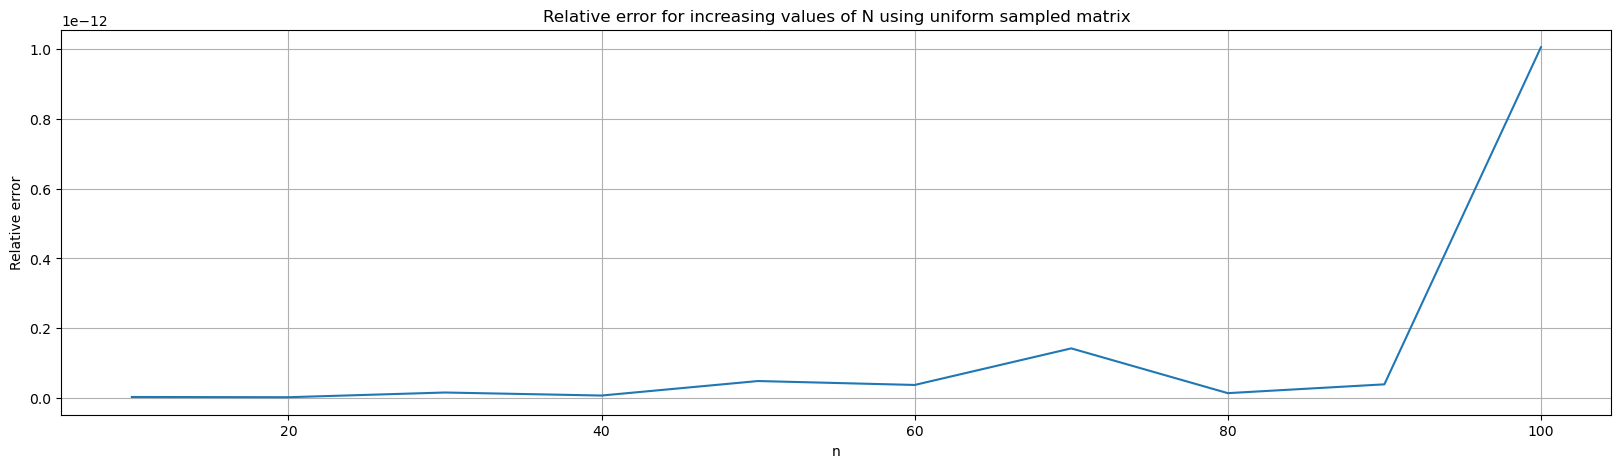

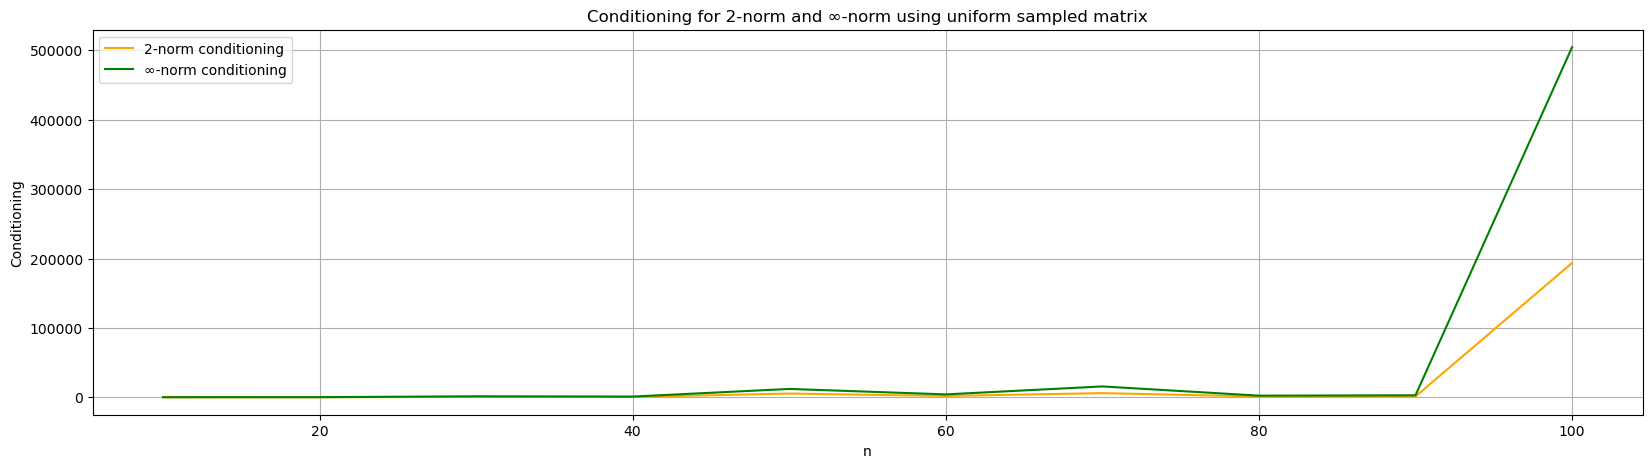

In [21]:
linspace = np.linspace(10, 100, 10, dtype=int)
matrices = []
for n in linspace:
    matrices.append(np.random.rand(n,n))

plot_relative_error(matrices, linspace, 'uniform sampled matrix')
plot_conditioning(matrices, linspace, 'uniform sampled matrix')

> Testing the program with n vandermonde matrices with size varying between n = {5, 10, 15, ..., 30}

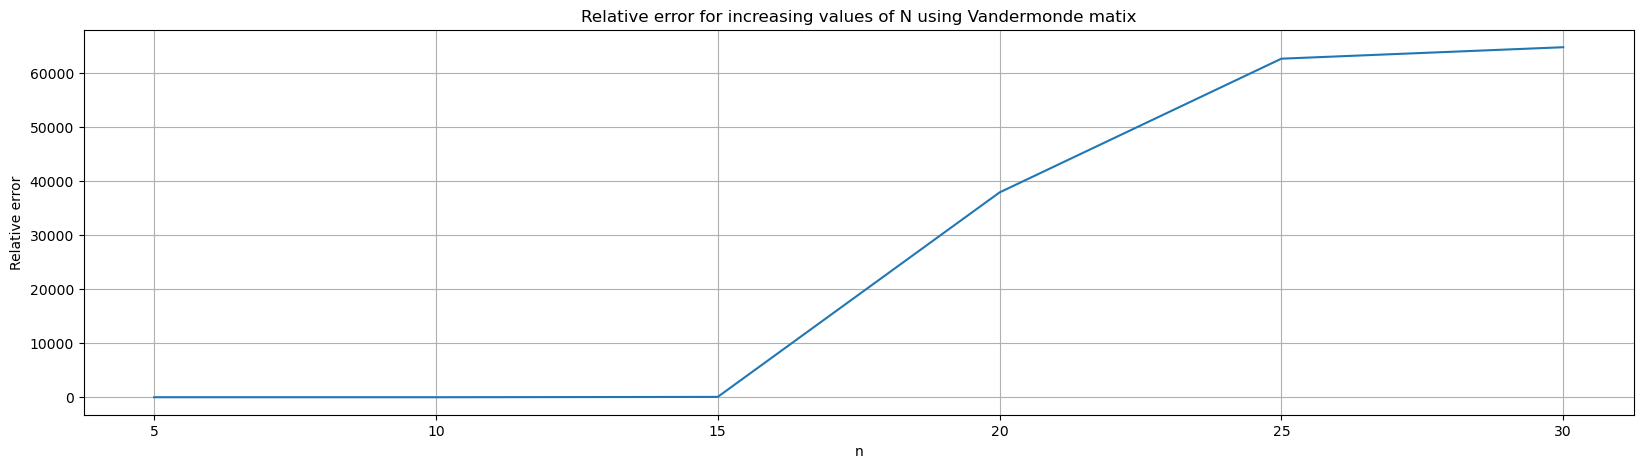

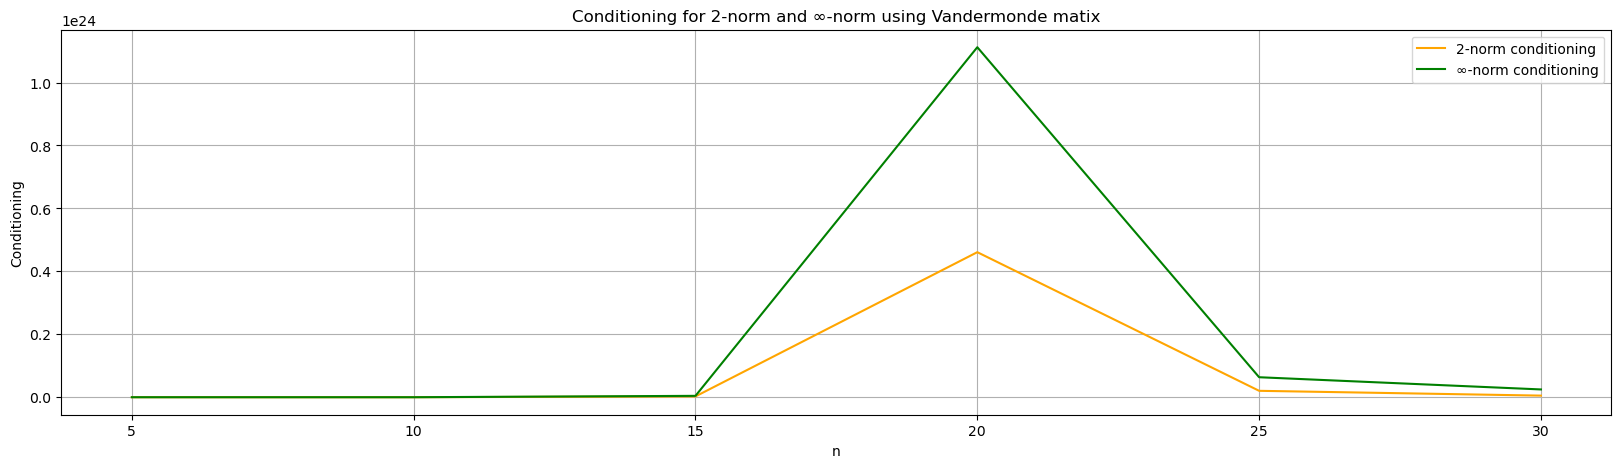

In [27]:
linspace = np.linspace(5, 30, 6, dtype=int)
matrices = []
for n in linspace:
    x = np.linspace(1, n, n, dtype=int)
    matrices.append(np.vander(x, n))

plot_relative_error(matrices, linspace, 'Vandermonde matix')
plot_conditioning(matrices, linspace, 'Vandermonde matix')

> Testing the program with n hilbert matrices with size varying between n = {4, 5, 6, ..., 12}

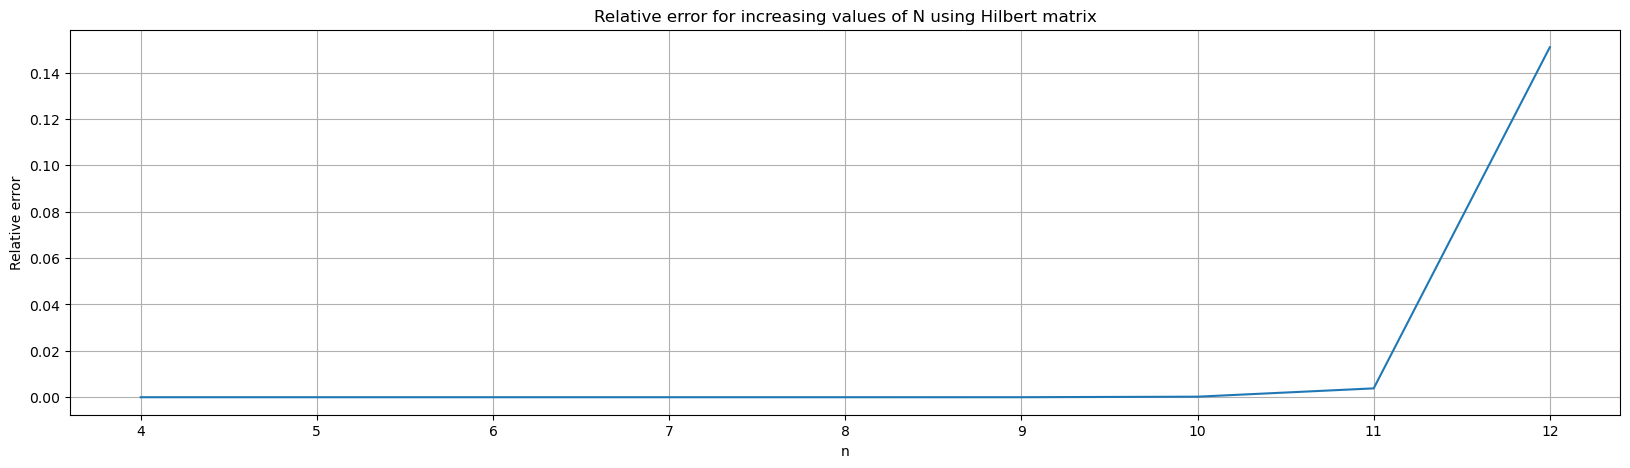

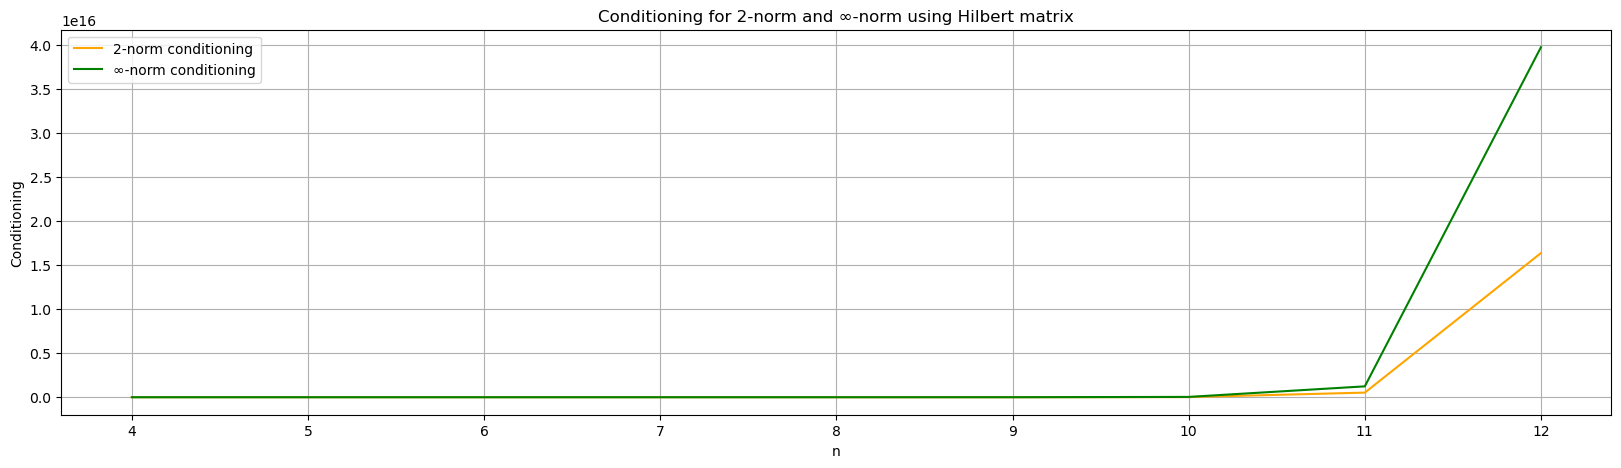

In [28]:
linspace = np.linspace(4, 12, 9, dtype=int)
matrices = []
for n in linspace:
    matrices.append(sp.linalg.hilbert(n))

plot_relative_error(matrices, linspace, 'Hilbert matrix')
plot_conditioning(matrices, linspace, 'Hilbert matrix')

# Floating Point Arithmetic

>Computing machine epsilon

In [70]:
eps = old_eps = 1

while 1 + eps > 1:
    old_eps = eps
    eps /= 2

print(f'Machine epsilon: {old_eps}')
print(f'1+old_eps: {1+old_eps}')
print(f'1+eps: {1+eps}')

Machine epsilon: 2.220446049250313e-16
1+old_eps: 1.0000000000000002
1+eps: 1.0


> Choose different values for n, compute an and compare it to the real value of the Euler costant.  

In [30]:
def plot_euler_approximation(start, stop, n, e):
    print(e)
    domain = np.linspace(start, stop, n, dtype=int)
    a_n = (1+1/domain)**domain

    e_constant_function = e*np.ones((n,))

    plt.plot(domain, a_n)
    plt.plot(domain, e_constant_function)
    plt.xlabel('n')
    plt.ylabel('y')
    plt.grid()
    plt.legend(['(1+1/n)^n', 'e'])
    plt.show()

    max_computed = max(a_n)
    print(f'Distance between e and the max point computed {abs(e-max_computed)}')

2.718281828459045


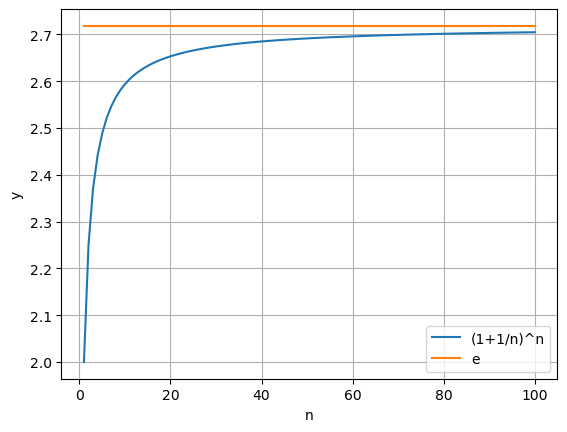

Distance between e and the max point computed 0.01346799903751661


In [31]:
n = 100
plot_euler_approximation(1, n, n, e)

But if we focus on the interval starting from a larger value of n we saw that the serie has some treshold. It can't increase anymore because it reaches a value lower that the machine epsilon due to the 1/n term, leading to add a very small number from 1, losing precision as consequence (Cancellation error).

Distance between e and the serie with n=10000000: 1.3432696333026684e-07
2.718281828459045


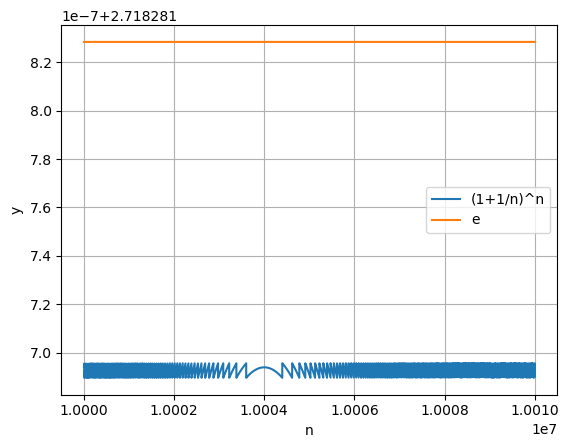

Distance between e and the max point computed 1.327770275949547e-07
Max of the serie in the interval: 2.7182816956820175
Min of the serie in the interval: 2.7182816895362283


In [73]:
N = 10000000
treshold = 10000
print(f'Distance between e and the serie with n={N}: {abs(e-(1+1/N)**N)}')

plot_euler_approximation(N, N+treshold, treshold, e)

To avoid this behaviour and increase the precision we can use the *mpmath* python library, which provides an arbitrary-precision arithmetic:

In [32]:
from mpmath import mp

In [41]:
N = 100000000000000
mp.dps = 70
a_n = (1+1/N)**N
mp_a_n = mp.power((1+1/N),N)
print(f'Distance between e and the max point computed without mpmat: {abs(e - a_n)}')
print(f'Distance between e and the max point computed with mpmat: {mp.fabs(mp.e - mp_a_n)}')

Distance between e and the max point computed without mpmat: 0.0021717943720220845
Distance between e and the max point computed with mpmat: 0.002171794372022449784707545945575576335063228773464645240418148386298357


>Compute the rank of A and B and their eigenvalues.

In [75]:
A = [[4,2],
     [1,3]]

B = [[4,2],
     [2,1]]

A = np.array(A)
B = np.array(B)

A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)

print(f'A rank: {A_rank}')
print(f'B rank: {B_rank}\n')

print(f'A eigenvalues: {np.linalg.eigvals(A)}')
print(f'B eigenvalues: {np.linalg.eigvals(B)}\n')

print(f'{"A is full rank" if A_rank == A.shape[0] else "A is not full rank"}')
print(f'{"B is full rank" if B_rank == B.shape[0] else "B is not full rank"}')

A rank: 2
B rank: 1

A eigenvalues: [5. 2.]
B eigenvalues: [5. 0.]

A is full rank
B is not full rank


A is a full rank matrix while B is not.  
It seems that if the matrix is full rank then it has different, non-zero eigenvalues.  
Maybe it can be related to the linear independence of the vector. 

In [29]:
A = [[4,2,2],
     [1,3,3],
     [4,1,1]]

B = [[4,2,3],
     [2,1,1],
     [1,0,9]]

A = np.array(A)
B = np.array(B)

A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)

print(f'A rank: {A_rank}')
print(f'B rank: {B_rank}\n')

print(f'A eigenvalues: {np.linalg.eigvals(A)}')
print(f'B eigenvalues: {np.linalg.eigvals(B)}\n')

A rank: 2
B rank: 3

A eigenvalues: [ 7.16227766e+00  8.37722340e-01 -2.42954950e-16]
B eigenvalues: [-0.02362319  4.39757765  9.62604554]



Again, an eigenvalue of A 'is' 0 because (?) A is not a full rank matrix.  
Since we know that the determinant of a matrix is the product of its eigenvalues, and we know that the determinant of a non-full rank matrix is 0 (because by definition the rank of a matrix is the dimension of the bigger non-singular matrix) we can deduce that the determinant of a matrix is zero if and only if at least one of its eigenvalues is zero.  
Thus, if a matrix is not full rank then it has at least one zero-valued eigenvalue.